In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from venn import venn
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="upsetplot")
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset

# Load Dataset

In [ ]:
# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("nedjmaou/MLMA_hate_speech")

README.md:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

ar_dataset.csv:   0%|          | 0.00/594k [00:00<?, ?B/s]

en_dataset.csv:   0%|          | 0.00/721k [00:00<?, ?B/s]

en_dataset_with_stop_words.csv:   0%|          | 0.00/860k [00:00<?, ?B/s]

fr_dataset.csv:   0%|          | 0.00/571k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/18661 [00:00<?, ? examples/s]

In [2]:
ds['train']

Dataset({
    features: ['HITId', 'tweet', 'sentiment', 'directness', 'annotator_sentiment', 'target', 'group'],
    num_rows: 18661
})

In [66]:
train = ds['train'].to_pandas()

# Assign language groups by row ranges
train['language'] = None
train.loc[:3352, 'language'] = 'arabic'      # 0 to 3352 (inclusive)
train.loc[3353:14646, 'language'] = 'english' # 3353 to 14646 (inclusive)
train.loc[14647:, 'language'] = 'french'      # 14647 to end

# Move 'language' to be the 3rd column
cols = list(train.columns)
cols.insert(2, cols.pop(cols.index('language')))
train = train[cols]

# Check the assignment
print(train['language'].value_counts(dropna=False))

train.head()

language
english    11294
french      4014
arabic      3353
Name: count, dtype: int64


,HITId,tweet,language,sentiment,directness,annotator_sentiment,target,group
0,1,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,arabic,hateful_normal,indirect,shock,gender,individual
1,2,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,arabic,offensive,indirect,anger_confusion_sadness_indifference_disgust,other,other
2,3,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,arabic,offensive,indirect,indifference,other,individual
3,4,@user @user انا اوافقك بخصوص السوريين و العراق...,arabic,normal,direct,indifference,origin,other
4,5,هذه السعودية التي شعبها شعب الخيم و بول البعير...,arabic,normal,indirect,indifference,origin,other


# Visualizations

## Sentiment Overlap

In [174]:
pd.set_option('display.max_rows', 10000)  # Show all rows in output

# Sentiment column needs to be cleaned

print(train['sentiment'].value_counts())

sentiment
offensive                                          8194
normal                                             3058
hateful                                            1297
abusive                                             615
offensive_hateful                                   554
abusive_offensive                                   422
abusive_hateful                                     378
offensive_disrespectful                             351
abusive_disrespectful                               351
disrespectful                                       329
fearful                                             304
offensive_normal                                    275
disrespectful_normal                                272
hateful_disrespectful                               240
abusive_normal                                      237
hateful_normal                                      182
fearful_abusive_offensive_hateful_disrespectful     176
abusive_offensive_hateful_disrespectfu

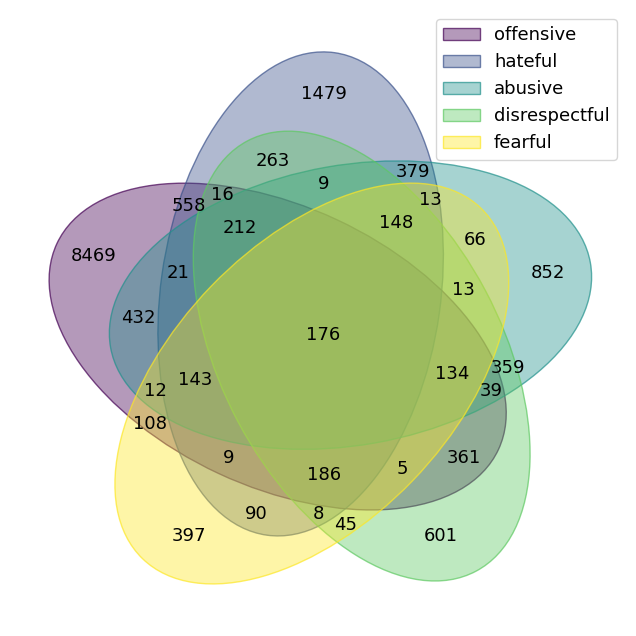

In [176]:
# Not recommended for 5 sets, but venn diagram for reference:

base_labels = ['offensive', 'hateful', 'abusive', 'disrespectful', 'fearful']

# Each set contains indices where the label appears anywhere in the sentiment string
venn_data = {
    label: set(train.index[train['sentiment'].str.contains(rf'{label}', regex=True)])
    for label in base_labels
}
venn(venn_data)
plt.show()

<Figure size 1000x800 with 0 Axes>

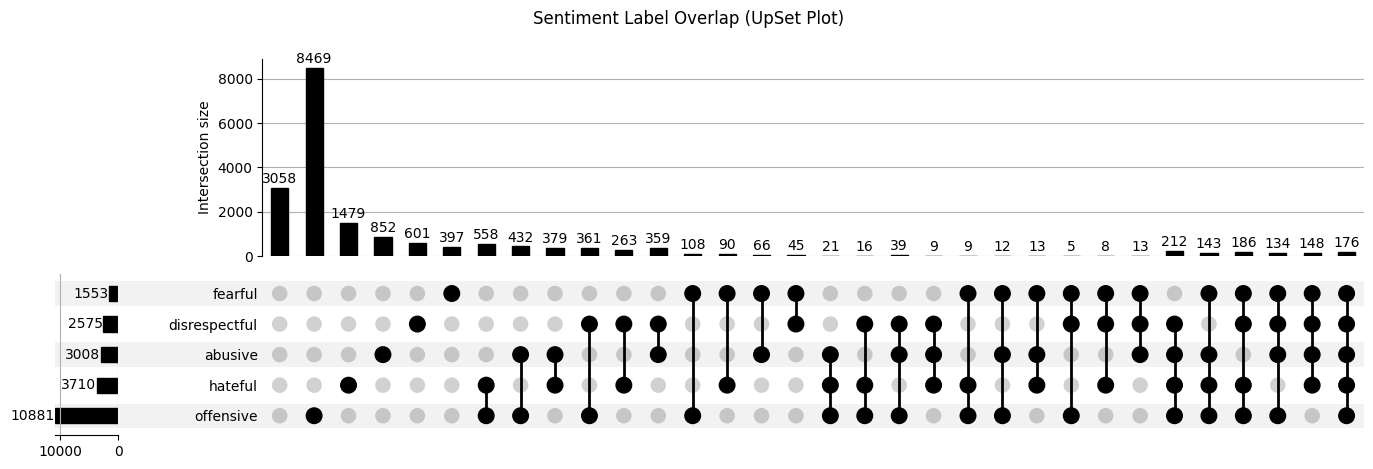

In [177]:
# base sentiment labels
base_labels = ['offensive', 'hateful', 'abusive', 'disrespectful', 'fearful']

# indicator columns for each base sentiment label
for label in base_labels:
    train[label] = train['sentiment'].str.contains(label)

# Upset data
upset_data = from_indicators(base_labels, train[base_labels])

plt.figure(figsize=(10,8))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle('Sentiment Label Overlap (UpSet Plot)')
plt.show()

## Number of Characters & Number of Words

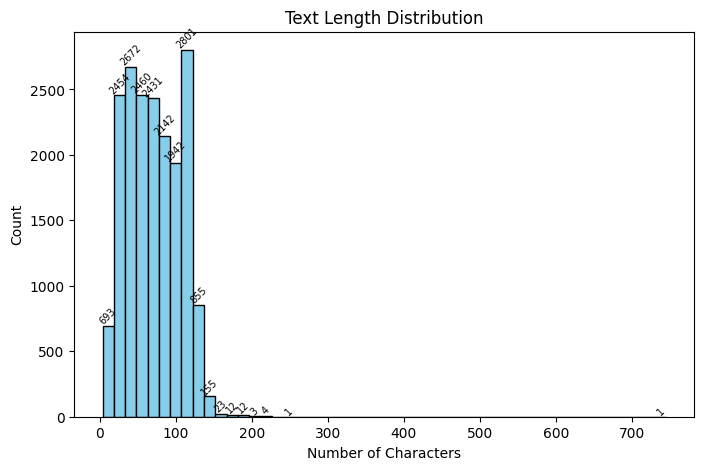

In [80]:
# --- Number of characters distribution ---
train['text_length'] = train['tweet'].astype(str).apply(len)
plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(train['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Count')

# Add value counts for the bins
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=7, rotation = 45)

plt.show()

In [121]:
# Tweets with more than 150 characters

print(train['tweet'].where(train['text_length'] > 150).dropna().values)

['What measures you should opt for to keep the premises of your \\ud83c\\udfe2 office kitchen and break/lunch rooms \\ud83e\\uddf9 spic &amp; span\\u2026 @URL'
 'Scomo the biggest faggot in Madden history\\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude02he just bashes everyone who has anything to do with Madden because he\\u2026 @URL'
 'So because I\\u2019m not looking to be in a relationship means I\\u2019m trying hoe around ? \\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude02 the retard juice is strong'
 'Some cunt smashed my phone out my hand last night \\ud83e\\udd26\\ud83c\\udffd\\u200d\\u2640\\ufe0f\\ud83e\\udd26\\ud83c\\udffd\\u200d\\u2640\\ufe0f\\ud83e\\udd26\\ud83c\\udffd\\u200d\\u2640\\ufe0f\\ud83e\\udd26\\ud83c\\udffd\\u200d\\u2640\\ufe0f'
 "@user Camerroonians don't do celebrities \\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude02 some people surely want to shout oh but they don't wanna look retarded\\ud83d\\ude02"
 '|\\uffe3\\uffe3\\uffe3\\uffe3\\uffe3\\uffe3\\uffe3\\u

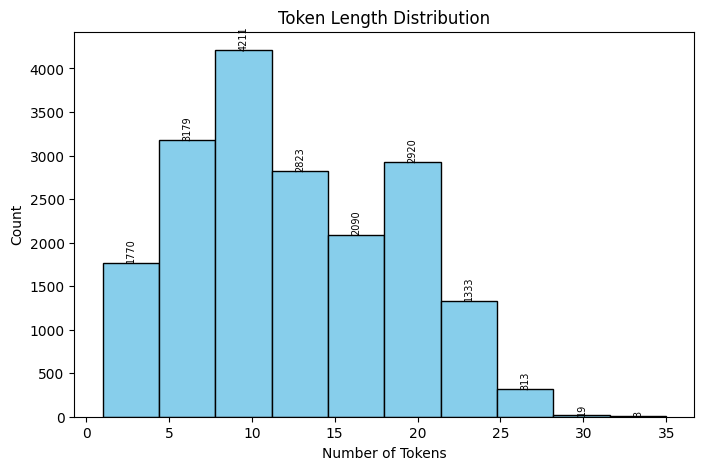

In [99]:
# If you want token length (for BERT), use:
train['token_length'] = train['tweet'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
plt.hist(train['token_length'], color='skyblue', edgecolor='black')
plt.title('Token Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Count')

# Add value counts for the bins
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=7, rotation=90)

plt.show()

In [186]:
print(train['tweet'].where(train['token_length'] > 28).dropna().values)

['فكره التحرش دي بتبقي عامله زي ال حد اللي ماشي جعان و لقي مطعم حاطط سيخ الشاورما بره ، ف راح سرق السيخ ده و قال م هم… @url'
 'ملاحظة حتى انه تعلق على بنت انها سمينة او شنعة او جسمها مش متناسق او شعرها خشن هذا بندرج تحت التحرش لانه مش شرط التحرش اللفظي يكون كلمات غزل'
 'مش عايز احبط حد بس بعد ما سافرت و شوفت الحريم اللي بجد اجانب و عرب و كدا اكتشفت ان الحريم المصرية  هم سبب النكد و سبب الوفاه المبكر'
 'القبول حاجة مش بإيدينا يا جماعة والله ومش شرط إنه يكون الشخص وحش لا خالص هو احساس بييجي لوحده ومش سهل إنه يتغير هو مش زرار هندوس عليه يعني'
 'what the fuck is this ching chong siopao dimsum shit sa question 3 ???? cant understand cant c o n t e x t u a l i z e kasi it is so vague'
 "As a kid I would've hated to have moved to a different part of the country but as an adult I can't wait to get away from the shithole"
 '@user @user Susan did I ask?? No so go back to where you come from ok \\ud83d\\udc4d \\nAnd don\\u2019t forget to buy and stream mono while you\\u2019re at it'
 'i stg when 

## Distributions

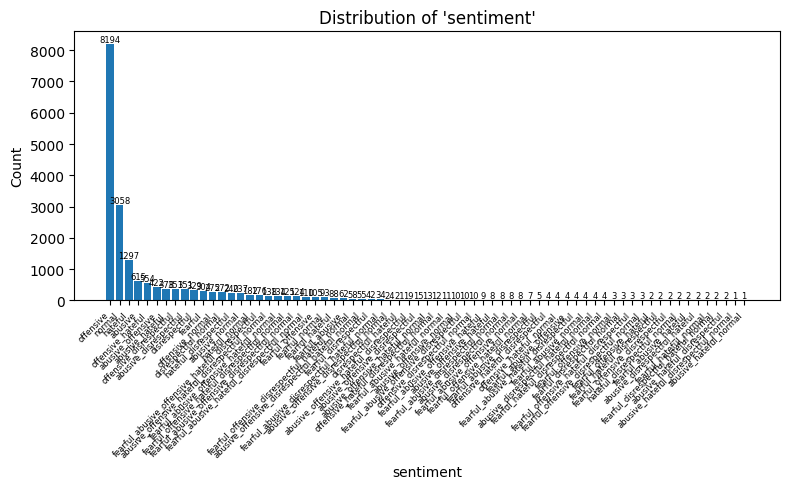

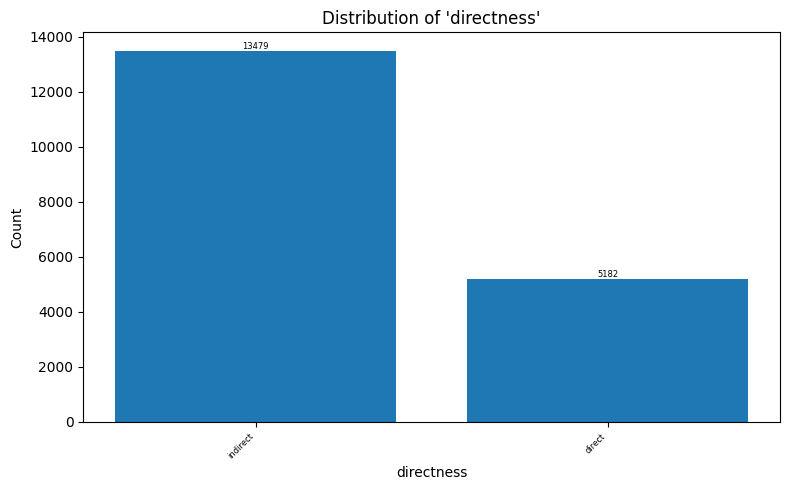

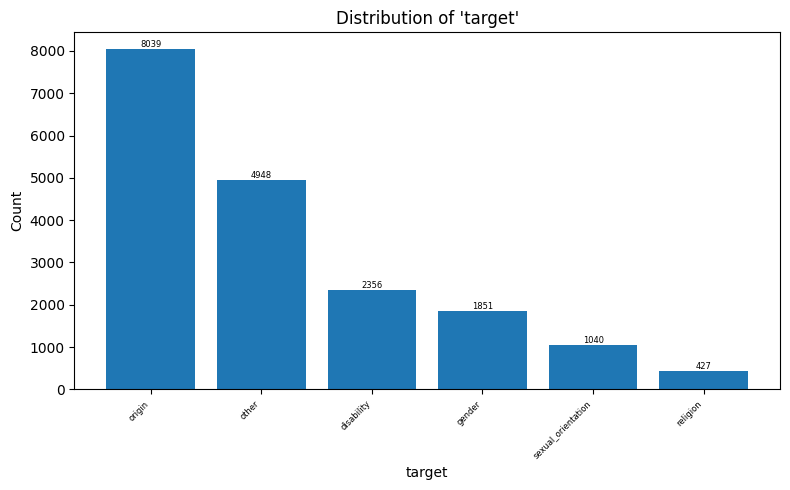

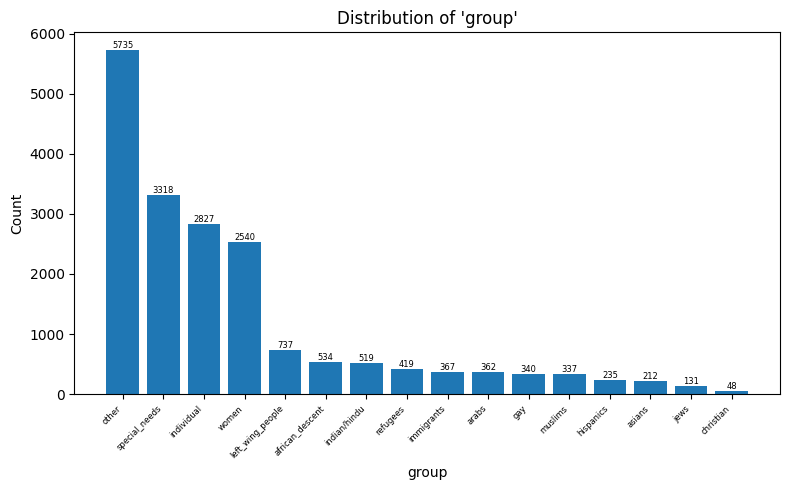

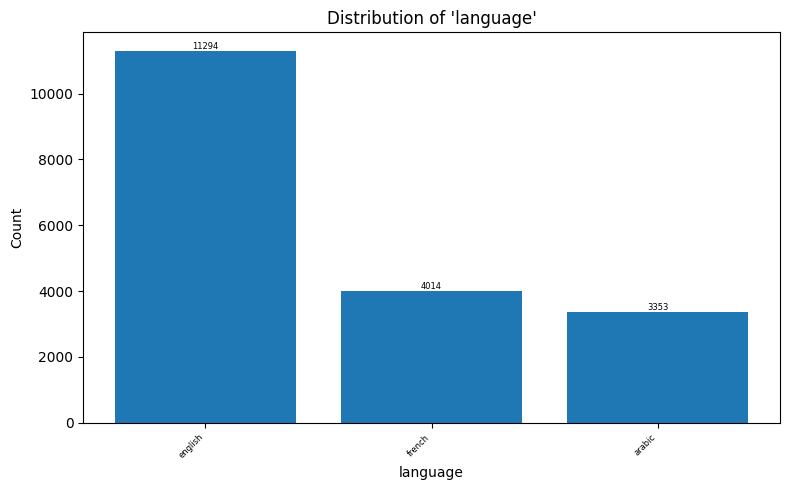

In [178]:
def plot_distribution(column):
    directness_counts = train[column].value_counts()
    plt.figure(figsize=(8, 5))
    bars = plt.bar(directness_counts.index.astype(str), directness_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Distribution of '{column}'")
    plt.xticks(rotation=45, ha='right', fontsize=6)

    # Add value labels on top of bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())),
                ha='center', va='bottom', fontsize=6)

    plt.tight_layout()
    plt.show()

plot_distribution('sentiment')
plot_distribution('directness')
plot_distribution('target')
plot_distribution('group')
plot_distribution('language')

## Correlations and Co-occurrences

                    sentiment_encoded  directness_encoded  target_encoded  \
sentiment_encoded            1.000000            0.249796       -0.022988   
directness_encoded           0.249796            1.000000       -0.067544   
target_encoded              -0.022988           -0.067544        1.000000   
group_encoded                0.074060            0.210119       -0.254099   
language_encoded            -0.092851           -0.194637       -0.019359   

                    group_encoded  language_encoded  
sentiment_encoded        0.074060         -0.092851  
directness_encoded       0.210119         -0.194637  
target_encoded          -0.254099         -0.019359  
group_encoded            1.000000         -0.252492  
language_encoded        -0.252492          1.000000  


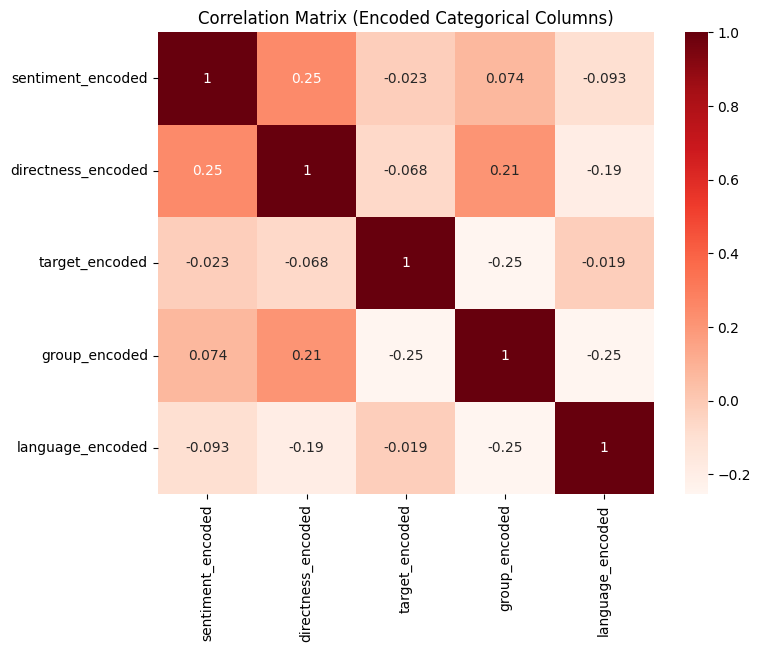

In [198]:
# Label encode the 5 categorical columns
categorical_cols = ['sentiment', 'directness', 'target', 'group', 'language']
for col in categorical_cols:
    le = LabelEncoder()
    train[col + '_encoded'] = le.fit_transform(train[col].astype(str))

# Create a DataFrame with only the encoded columns
encoded_df = train[[col + '_encoded' for col in categorical_cols]]

# Show correlation matrix for the encoded categorical columns
correlation_matrix = encoded_df.corr()
print(correlation_matrix)

# Optional: visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix (Encoded Categorical Columns)')
plt.show()

Sentiment Cooccurrences


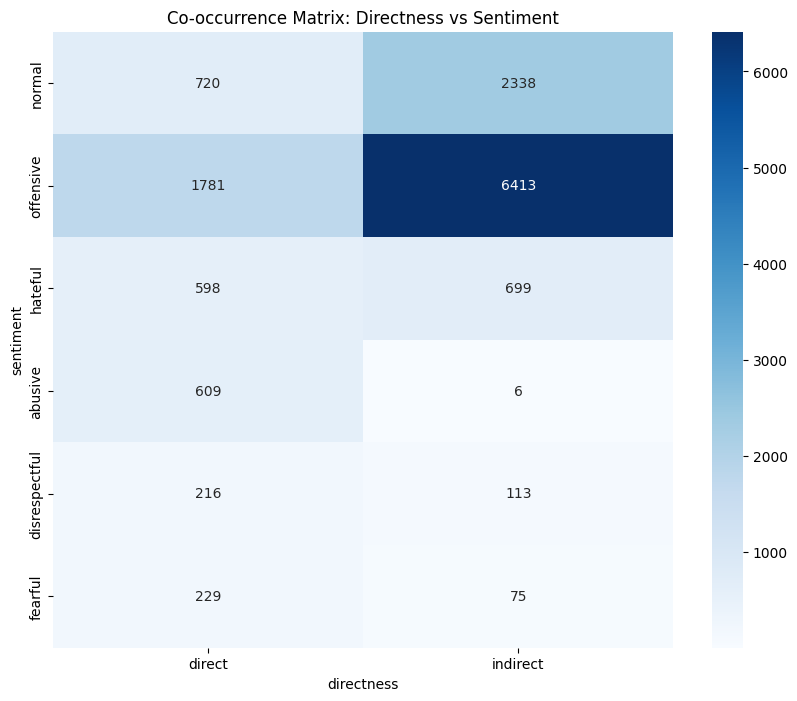

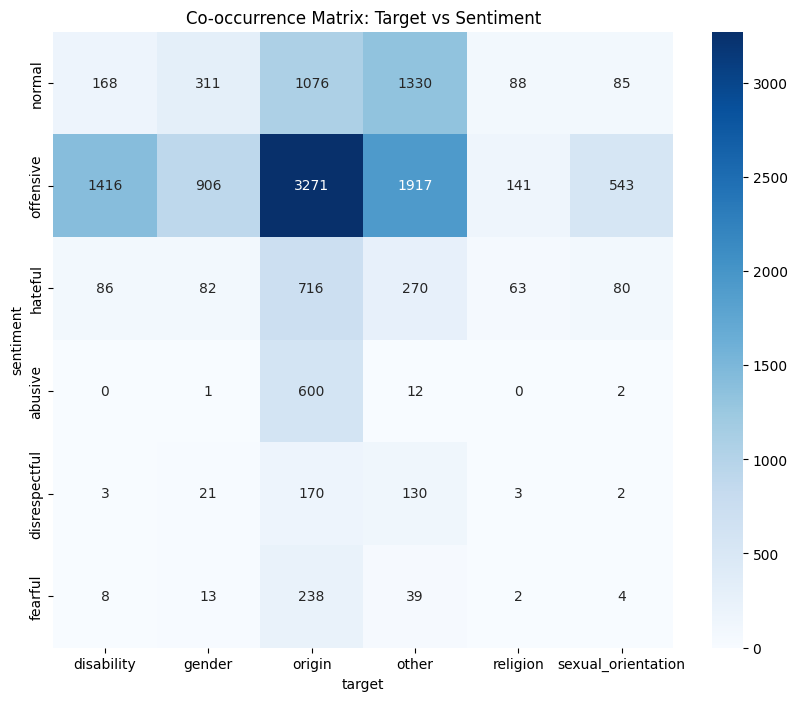

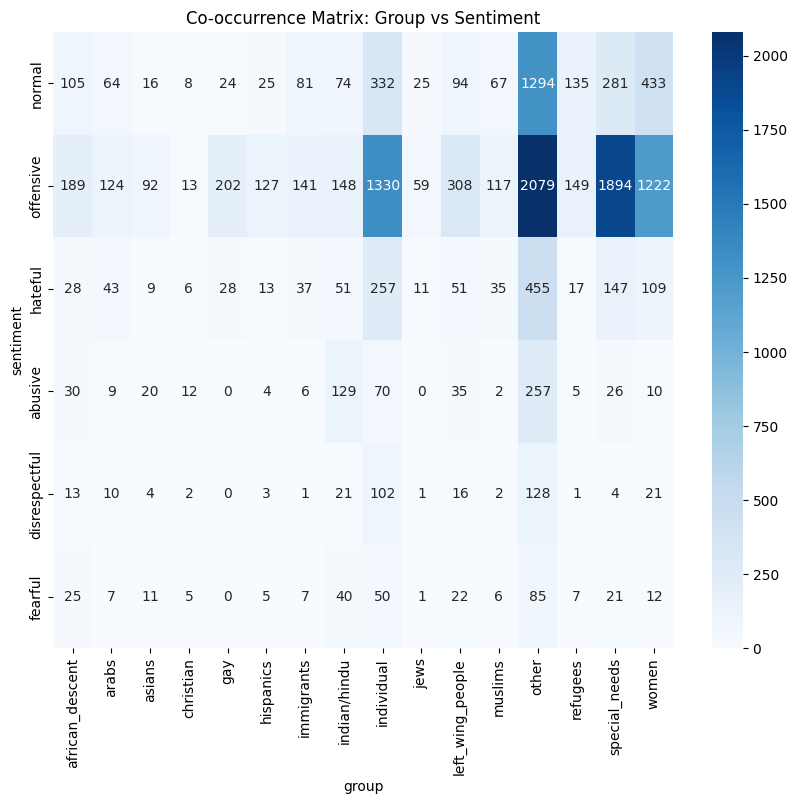


Language Cooccurrences


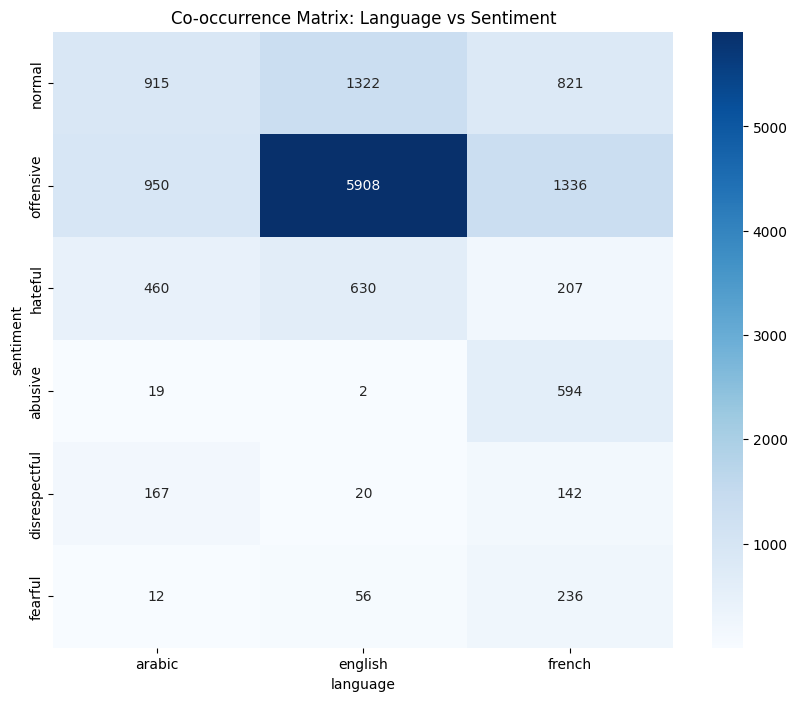

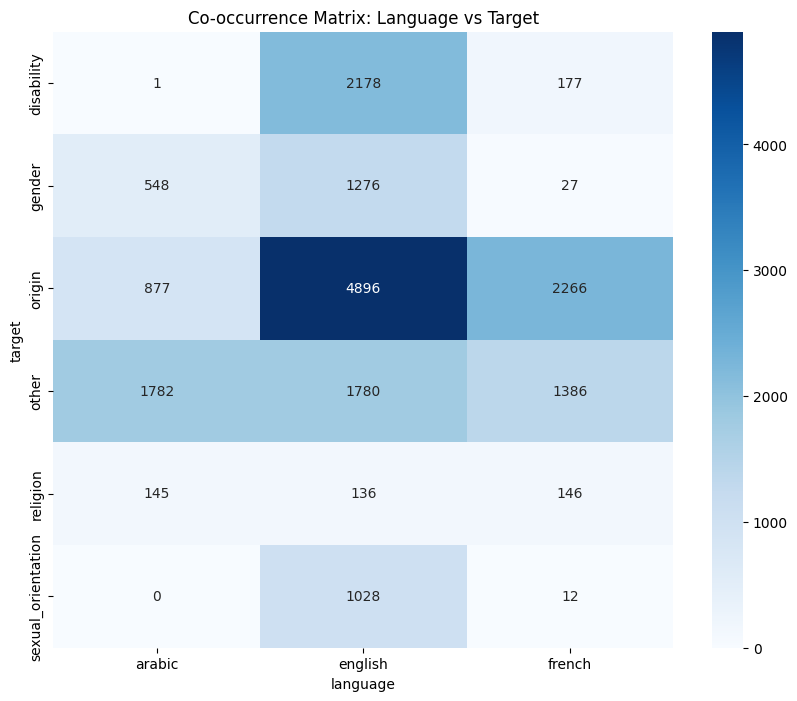

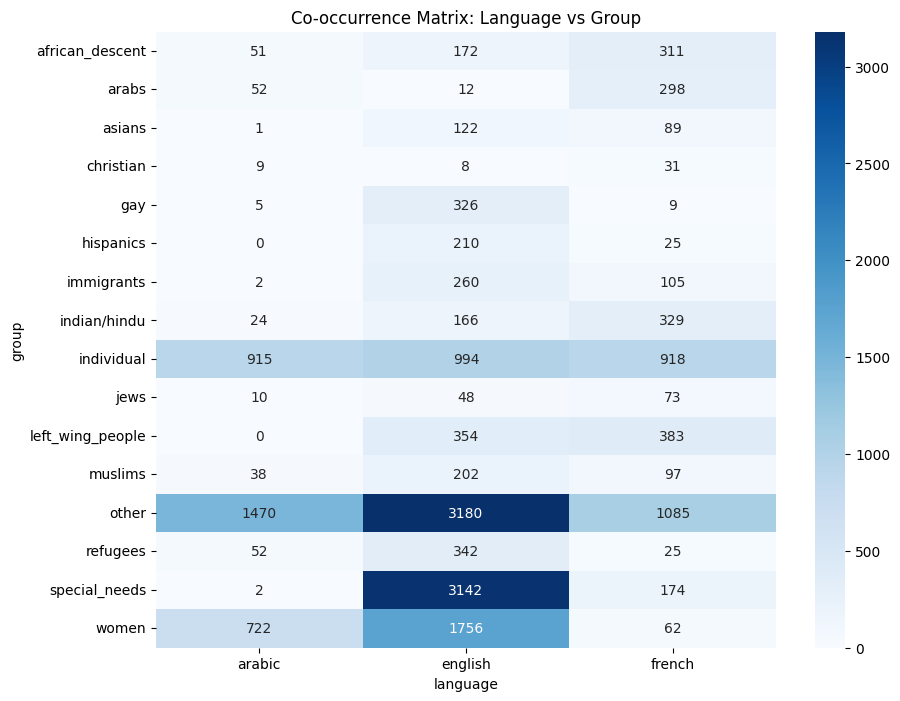


Directness Cooccurrences


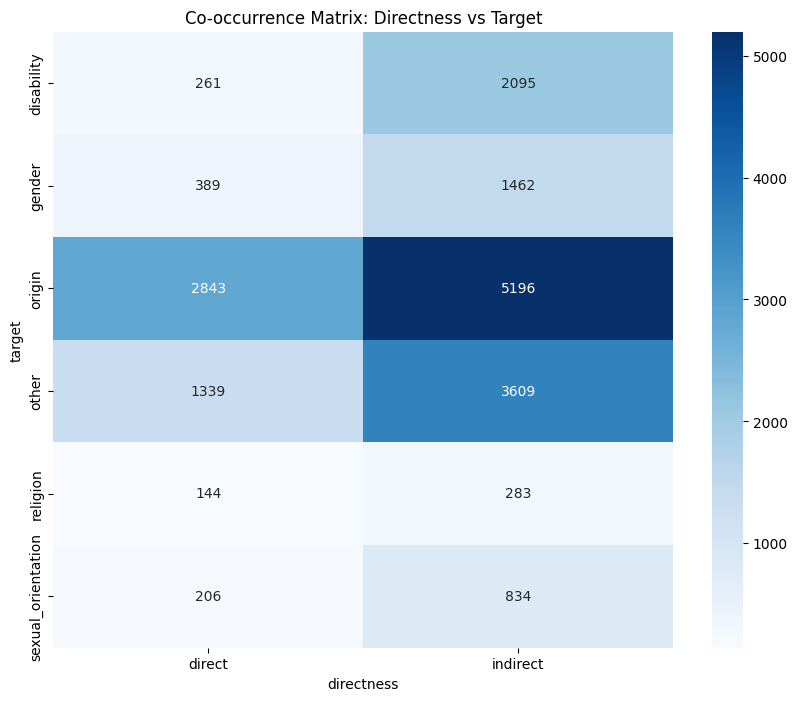

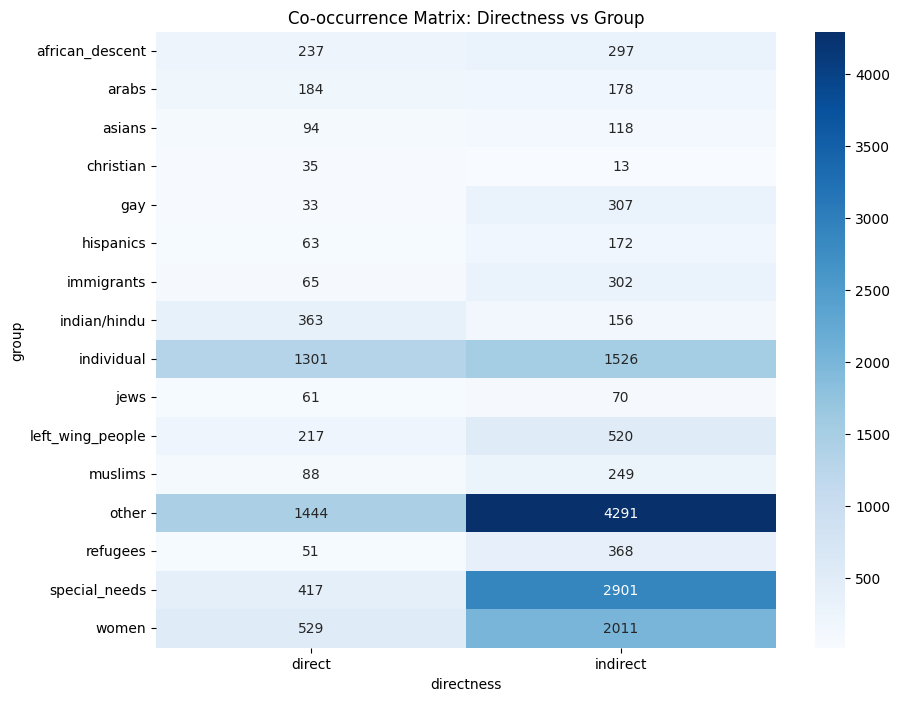

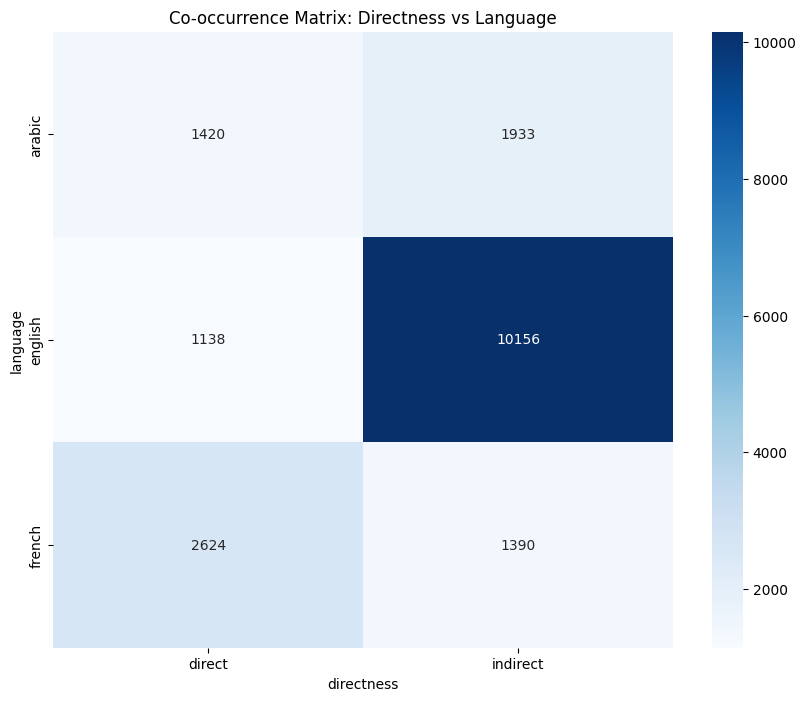


Group vs. Target


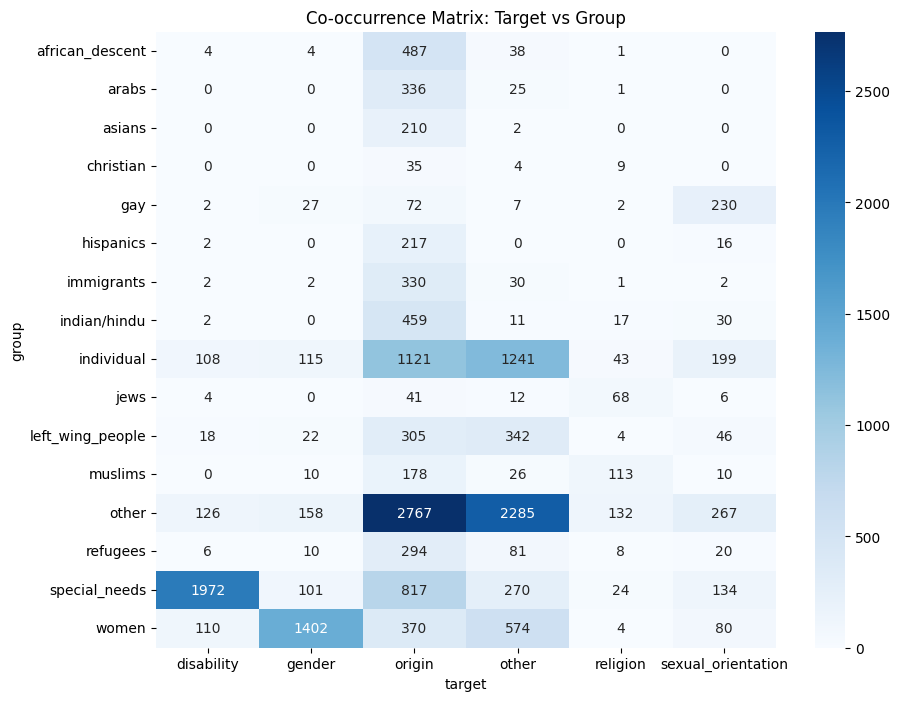

In [200]:
def plot_cooccurrence_matrix(col1, col2, col1_name, col2_name):
    cooccurrence = pd.crosstab(
        train[col1_name], train[col2_name]
    ).reindex(index=col1, columns=col2, fill_value=0)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cooccurrence, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Co-occurrence Matrix: {col2_name.title()} vs {col1_name.title()}')
    plt.xlabel(col2_name)
    plt.ylabel(col1_name)
    plt.xticks()
    plt.yticks()
    plt.show()

sentiments = ['normal', 'offensive', 'hateful', 'abusive', 'disrespectful', 'fearful']
directness = sorted(train['directness'].unique())
target = sorted(train['target'].unique())
group = sorted(train['group'].unique())
language = sorted(train['language'].unique())

print("Sentiment Cooccurrences")
plot_cooccurrence_matrix(sentiments, directness, 'sentiment', 'directness')
plot_cooccurrence_matrix(sentiments, target, 'sentiment', 'target')
plot_cooccurrence_matrix(sentiments, group, 'sentiment', 'group')
print("\nLanguage Cooccurrences")
plot_cooccurrence_matrix(sentiments, language, 'sentiment', 'language')
plot_cooccurrence_matrix(target, language, 'target', 'language')
plot_cooccurrence_matrix(group, language, 'group', 'language')
print("\nDirectness Cooccurrences")
plot_cooccurrence_matrix(target, directness, 'target', 'directness')
plot_cooccurrence_matrix(group, directness, 'group', 'directness')
plot_cooccurrence_matrix(language, directness, 'language', 'directness')
print("\nGroup vs. Target")
plot_cooccurrence_matrix(group, target, 'group', 'target')


## Language Differences

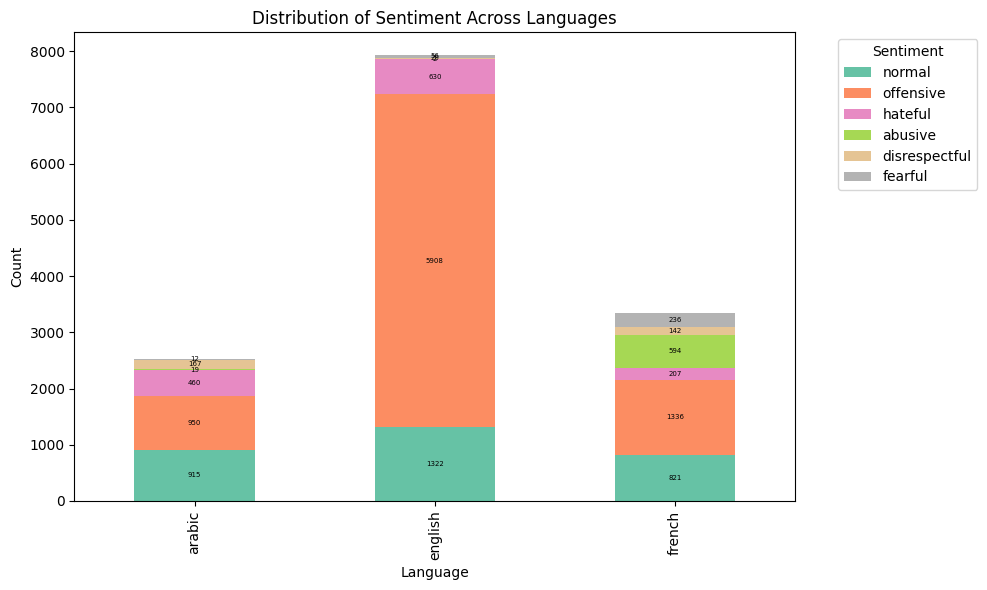

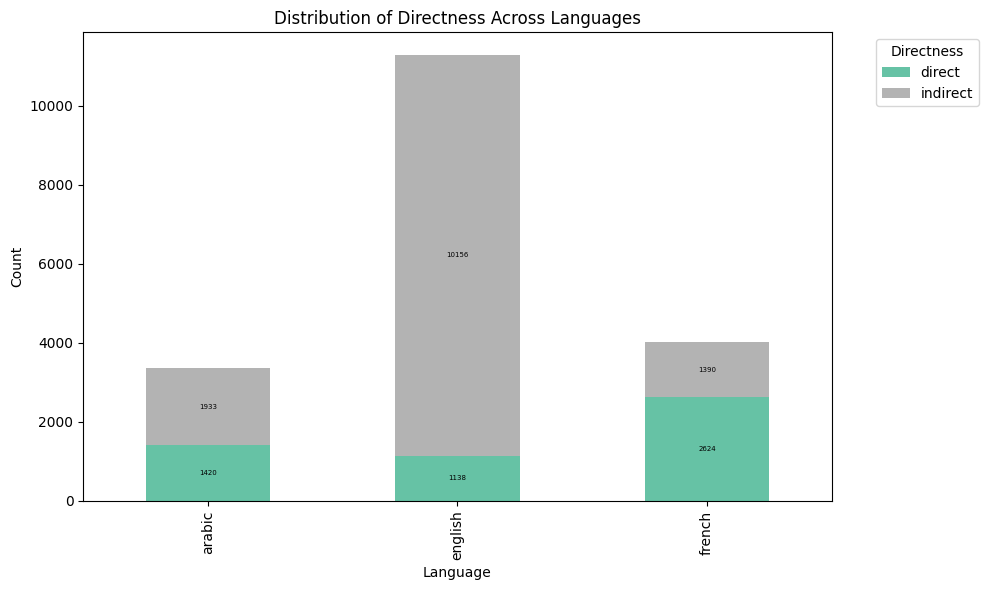

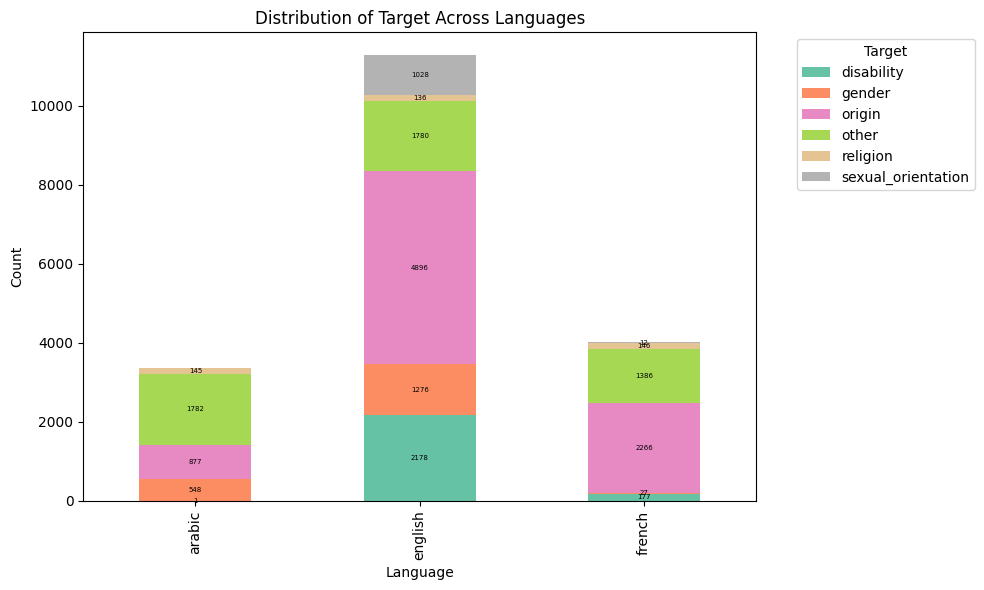

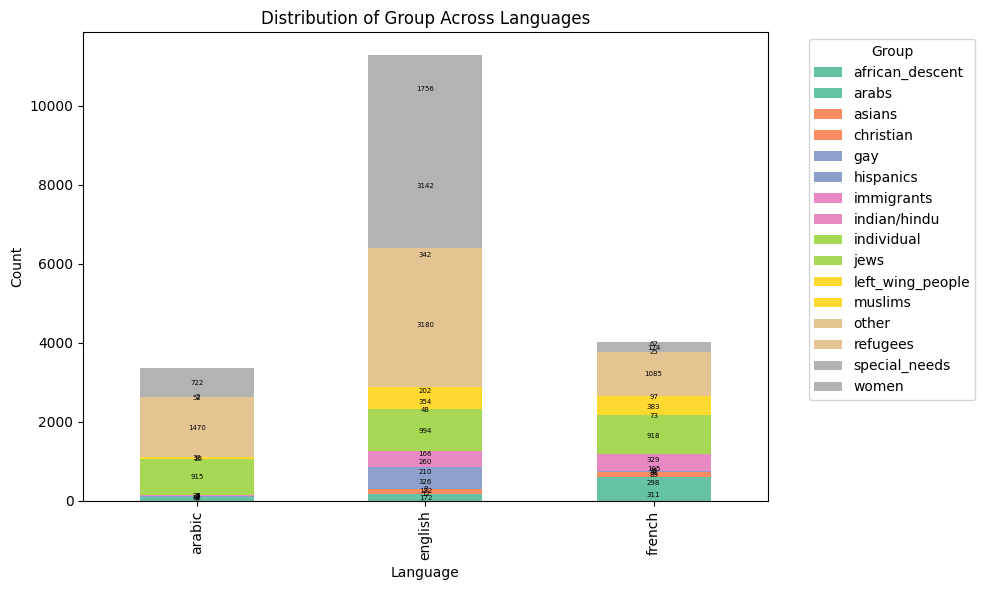

In [ ]:
# Language vs. Label Distribution: Stacked Bar Plot
for label in ['sentiment', 'directness', 'target', 'group']:
    plt.figure(figsize=(10, 6))
    lang_label_counts = pd.crosstab(train['language'], train[label])
    if label == 'sentiment':
        # Restrict columns to only the specified sentiments, fill missing with 0
        sentiments = ['normal', 'offensive', 'hateful', 'abusive', 'disrespectful', 'fearful']
        lang_label_counts = lang_label_counts.reindex(columns=sentiments, fill_value=0)
    ax = lang_label_counts.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,6), ax=plt.gca())
    plt.title(f'Distribution of {label.title()} Across Languages')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.legend(title=label.title(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    # Add value counts on top of each bar segment
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}',
                            (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            ha='center', va='center', fontsize=5, color='black')

    plt.show()


In [179]:
# Show a few sample texts per class per language
def show_samples_per_class_per_language(column, n=3):
    print(f"\nSample texts for each {column} per language:")
    for lang in train['language'].dropna().unique():
        print(f"\n=== Language: {lang} ===")
        if column == 'sentiment':
            classes = ['normal', 'offensive', 'hateful', 'abusive', 'disrespectful', 'fearful']
        else:
            classes = train[column].dropna().unique()
        for cls in classes:
            print(f"\n--- {column.title()}: {cls} ---")
            samples = train[(train['language'] == lang) & (train[column] == cls)]['tweet'].dropna().head(n)
            if samples.empty:
                print("No samples available.")
            else:
                for i, text in enumerate(samples, 1):
                    print(f"{i}. {text}")

In [180]:
show_samples_per_class_per_language('sentiment', n=3)  


Sample texts for each sentiment per language:

=== Language: arabic ===

--- Sentiment: normal ---
1. @user @user انا اوافقك بخصوص السوريين و العراقيين اما بخصوص السعودي مو بحاجه انه يقعد بالكويت بدو… @url
2. هذه السعودية التي شعبها شعب الخيم و بول البعير  الذي يستهزأ بها الناس
3. صباح التوكل على الله والسعي على رزقه والثقة فيما عنده #افريقيا_يا_اهلى

--- Sentiment: offensive ---
1. صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اجنبي منك لله ربنا ياخدك ي… @url
2. طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم بدون ....... @url
3. @user و مدعمتهاش ليه فى كاس العالم يا جبان يا وسخ

--- Sentiment: hateful ---
1. @user @user الكردي كلب من يوم يومه بحاجة دائما لسيد وهلا اصبحتم خنازير اسرائيل بمرتبة الكلب
2. @user @user انت اكبر المشردين بايع ارضك وعرضك وتتكلم على اسيادك السعودية  ي كلب ي مرتزق ي خنزير
3. @user @user صح لسانك بس الكلب وفي وهذا خنزير نتن

--- Sentiment: abusive ---
1. @user @user @user أمك وأختك هي بنت 100 خنزير يا شاربي بول البعير يا متخلفون
2. #عباس_يمثل_نفسه محرف سورة الفيل 

In [181]:
show_samples_per_class_per_language('directness', n=3)  


Sample texts for each directness per language:

=== Language: arabic ===

--- Directness: indirect ---
1. صلاة الفجر خير لك من ترديد بول البعير وسبي النساء واغتصاب طفلة نظافة ونشاط وحيوية #عقلانيون
2. صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اجنبي منك لله ربنا ياخدك ي… @url
3. طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم بدون ....... @url

--- Directness: direct ---
1. @user @user انا اوافقك بخصوص السوريين و العراقيين اما بخصوص السعودي مو بحاجه انه يقعد بالكويت بدو… @url
2. ما عارف كنت شايفها منحرفة شديد وانا صغير ليه @url
3. وانتي مال امك يا مطلقة يا بايرة ياوش قنوات @url

=== Language: english ===

--- Directness: indirect ---
1. call sis im boy girl still faggot shut
2. @user @user legit nilas retarded idk
3. said retard @url

--- Directness: direct ---
1. @user i'm oprah winfrey. oprah singing faggot
2. @user queue fucking retarded makes everyone feel like even chance make fcfs fucksake
3. mongoloid ordered 9 dozen donuts 8 called back see sell craft coffee

=== Language: fren

In [147]:
show_samples_per_class_per_language('target', n=3) 


Sample texts for each target per language:

=== Language: arabic ===

--- Target: gender ---
1. صلاة الفجر خير لك من ترديد بول البعير وسبي النساء واغتصاب طفلة نظافة ونشاط وحيوية #عقلانيون
2. ما عارف كنت شايفها منحرفة شديد وانا صغير ليه @url
3. وانتي مال امك يا مطلقة يا بايرة ياوش قنوات @url

--- Target: other ---
1. صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اجنبي منك لله ربنا ياخدك ي… @url
2. طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم بدون ....... @url
3. @user @user تخيل يرد عليك يقولك حسب معلوماتنا ان سكان الارض يشربون بول البعير

--- Target: origin ---
1. @user @user انا اوافقك بخصوص السوريين و العراقيين اما بخصوص السعودي مو بحاجه انه يقعد بالكويت بدو… @url
2. هذه السعودية التي شعبها شعب الخيم و بول البعير  الذي يستهزأ بها الناس
3. @user @user الكردي كلب من يوم يومه بحاجة دائما لسيد وهلا اصبحتم خنازير اسرائيل بمرتبة الكلب

--- Target: religion ---
1. @user @user لا هندوس
2. والله هدف ما يدخل في فريق فئات سنية.. هدف ساذج يا خنازير
3. @user @user قال الشيعه الصفوين الروافض الابا

In [ ]:
show_samples_per_class_per_language('group', n=3) 


Sample texts for each group per language:

=== Language: arabic ===

--- Group: individual ---
1. صلاة الفجر خير لك من ترديد بول البعير وسبي النساء واغتصاب طفلة نظافة ونشاط وحيوية #عقلانيون
2. طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم بدون ....... @url
3. ما عارف كنت شايفها منحرفة شديد وانا صغير ليه @url

--- Group: other ---
1. صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اجنبي منك لله ربنا ياخدك ي… @url
2. @user @user انا اوافقك بخصوص السوريين و العراقيين اما بخصوص السعودي مو بحاجه انه يقعد بالكويت بدو… @url
3. هذه السعودية التي شعبها شعب الخيم و بول البعير  الذي يستهزأ بها الناس

--- Group: women ---
1. وانتي مال امك يا مطلقة يا بايرة ياوش قنوات @url
2. لكن حرمة متبرجة تقف على المسرح وتغني امام الر… @url
3. @user @user @user واضح انكم تكذبوها ع سالفه ان الحريم يقعدن بالارض  ولا انا فهمت غلط ودرعمت؟

--- Group: arabs ---
1. @user @user اعراب همج. ايش تتوقع من شاربين بول البعير
2. @user @user @user كمن فسر الماء بالماء.. ياغبي العالم كله عرف انكم خنازير مو بس السعوديين.. رح الشبك…